**Data Science using Python**

In [54]:
#Importacao de bibliotecas
import datetime
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import collections
#juntando todas as linhas para (tratando das quebras de linhas)
with open('WhatsApp.txt') as f:
  whatsapp = f.read()
  whatsapp = ' '.join(whatsapp.split('\n'))
#print(whatsapp)

pattern = '\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}\s-\s' #pattern = padrao data hora (buscando por dd/mm/yyyy hh:mm - )
messages = re.split(pattern, whatsapp)[1:] #split quando encontrar padrao datahora
message_dates =  re.findall(pattern, whatsapp) #busca pelo padrao datahora

pattern_remove = re.compile(r' - ') #busca pelo caracter -
message_dates_format = [pattern_remove.sub('', match) for match in message_dates] #Remove caracter


df = pd.DataFrame({'Dates':message_dates_format,'Messages':messages}) #criando o dataframe
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y %H:%M', dayfirst=True)
#print(df)
df_count_dates = df.groupby(df['Dates'].dt.date).size().reset_index(name='Count')



In [55]:
#Qual o dia da semana que mais troca mensagem.
week_dates = {
  0: "Domingo",
  1: "Segunda",
  2: "Terça",
  3: "Quarta",
  4: "Quinta",
  5: "Sexta",
  6: "Sabado"
}
list_hours = []
list_weekday = []
for date in message_dates_format:
  date_obj = datetime.datetime.strptime(date, '%d/%m/%Y %H:%M')
  list_hours.append(date_obj.hour)
  if (date_obj.weekday() == 1):
    list_weekday.append('Segunda')
  elif (date_obj.weekday() == 2):
    list_weekday.append('Terça')
  elif (date_obj.weekday() == 3):
    list_weekday.append('Quarta')
  elif (date_obj.weekday() == 4):
    list_weekday.append('Quinta')
  elif (date_obj.weekday() == 5):
    list_weekday.append('Sexta')
  elif (date_obj.weekday() == 6):
    list_weekday.append('Sabado')
  elif (date_obj.weekday() == 0):
    list_weekday.append('Domingo')  




**Gráfico com a frequência das mensagens ao longo dos dias da semana (segunda à domingo)**

Text(0, 0.5, 'Frequencia')

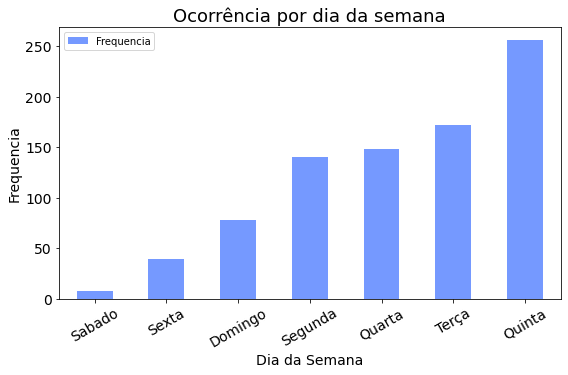

In [56]:
from matplotlib import pyplot as plt  
count_weekday = dict(Counter(list_weekday)) #contando as ocorrencias das datas por dia da semana
week_df = pd.DataFrame(count_weekday.items(), columns=['Dia da Semana', 'Frequencia'])
week_df.sort_values('Frequencia', inplace=True)
week_df.plot(kind="bar", x = 'Dia da Semana' , y='Frequencia',color='#7599ff',figsize = (9,5),fontsize=14)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Ocorrência por dia da semana", fontsize = 18)
plt.xlabel("Dia da Semana",fontsize = 14)
plt.ylabel("Frequencia",fontsize = 14)

**Gráfico com a frequência das mensagens ao longo das horas do dia**

Text(0, 0.5, 'Frequencia')

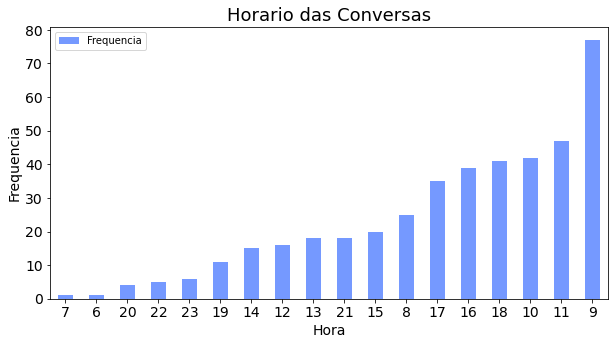

In [57]:
#Horarios x Frequencia
#count_hours = dict(Counter(list_hours))
#hours_df = pd.DataFrame(count_hours.items(), columns=['Hora', 'Frequencia'])
#hours_df.sort_values('Frequencia', inplace=True)
#hours_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Horario das Conversas', color='#7599ff',figsize = (8,5),fontsize = 12)

count_hours = dict(Counter(list_hours)) #contando as ocorrencias das datas por dia da semana
hours_df = pd.DataFrame(count_hours.items(), columns=['Hora', 'Frequencia'])
hours_df.sort_values('Frequencia', inplace=True)
hours_df.plot(kind="bar", x = 'Hora' , y='Frequencia',color='#7599ff',figsize = (10,5),fontsize=14)
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Horario das Conversas", fontsize = 18)
plt.xlabel("Hora",fontsize = 14)
plt.ylabel("Frequencia",fontsize = 14)


In [58]:
print('Horário com maior interação no grupo:')
print(hours_df[hours_df.Frequencia == hours_df.Frequencia.max()])

Horário com maior interação no grupo:
   Hora  Frequencia
1     9          77


In [59]:
print('Horários com menor interação no grupo:')
print(hours_df[hours_df.Frequencia == hours_df.Frequencia.min()])

Horários com menor interação no grupo:
    Hora  Frequencia
17     7           1
16     6           1


In [60]:
list_messages = []
users = []
for msg in messages:
  split_messages = re.split('([\w\W]+?):\s', msg) #regex para buscar padrao -> usuario:  
  if split_messages[1:]: #pega somente mensagens que foram enviadas por um usuario
    users.append(split_messages[1])
    list_messages.append(split_messages[2])
  else: #trativa para notificacoes de grupo (saida de usuario, cricacao do grupo, usuario novo adicionado ao grupo)
    users.append('group_notification')
    list_messages.append(split_messages[0])    
df['Users'] = users
df['Message'] = list_messages

df

,Dates,Messages,Users,Message
0,2016-01-11 18:24:00,"‎Priscila/mdnet criou o grupo ""MDnet""",group_notification,"‎Priscila/mdnet criou o grupo ""MDnet"""
1,2016-01-11 18:24:00,Você foi adicionado(a),group_notification,Você foi adicionado(a)
2,2020-10-07 09:06:00,Carla/mdnet: Bom dia a todos! Feliz aniversári...,Carla/mdnet,Bom dia a todos! Feliz aniversário Michelle! M...
3,2020-10-07 10:11:00,"Michelle: Oi Carla, muito obrigada! ☺️",Michelle,"Oi Carla, muito obrigada! ☺️"
4,2020-10-07 10:13:00,"Carla/mdnet: quase falei no call da UHG, mas f...",Carla/mdnet,"quase falei no call da UHG, mas fiquei com ver..."
...,...,...,...,...
416,2021-05-31 18:00:00,Carla/mdnet: https://www.sympla.com.br/future-...,Carla/mdnet,https://www.sympla.com.br/future-hr__1223928
417,2021-05-31 18:00:00,"Carla/mdnet: Pessoal, é pro mundo de RH, mas s...",Carla/mdnet,"Pessoal, é pro mundo de RH, mas se alguem tive..."
418,2021-05-31 18:01:00,Carla/mdnet: Evento online gratuito,Carla/mdnet,Evento online gratuito
419,2021-05-31 18:04:00,Everton Mdnet: https://www.linkedin.com/events...,Everton Mdnet,https://www.linkedin.com/events/rhsummit202167...


**Top 10 das palavras mais utilizadas desde a criação do grupo até 2021-05-21**

Text(0, 0.5, 'Frequência')

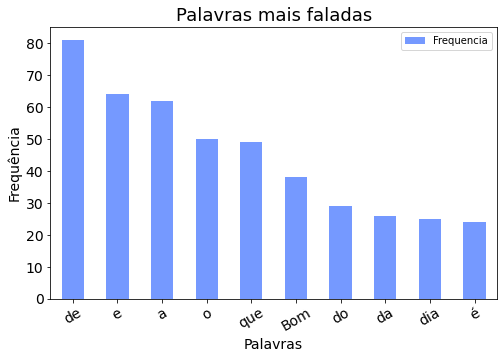

In [61]:
#Quais as palavras mais trocadas na conversa.
#Palavras x Frequencia

#wordfreq = df.Message.str.split(expand=True).stack().value_counts()
#words_df = pd.DataFrame(wordfreq.items(), columns=['Palavra', 'Frequencia'])
#words_df = words_df.sort_values(by=['Frequencia'], ascending=False)
#words_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas', color='#7599ff', fontsize=10)

wordfreq = df.Message.str.split(expand=True).stack().value_counts()
words_df = pd.DataFrame(wordfreq.items(), columns=['Palavra', 'Frequencia'])
words_df = words_df.sort_values(by=['Frequencia'], ascending=False)
words_df.head(10).plot(kind="bar", x = 'Palavra' , y='Frequencia',color='#7599ff',figsize = (8,5),fontsize=14)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Palavras mais faladas", fontsize = 18)
plt.xlabel("Palavras",fontsize = 14)
plt.ylabel("Frequência",fontsize = 14)

**Top 10 das palavras mais utilizadas no perído de 2021-01-01 à 2021-01-31**

Text(0, 0.5, 'Frequência')

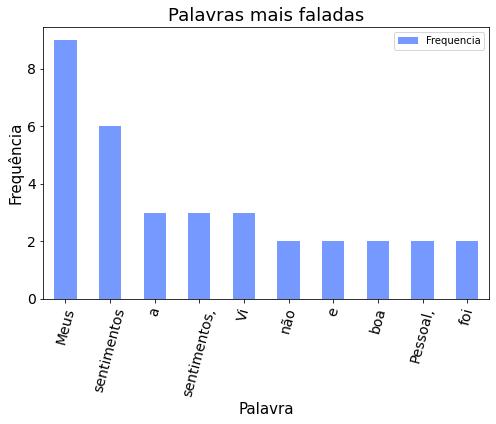

In [62]:
#df_filter = df[(df['Dates'] > '2021-01-01 00:00:00') & (df['Dates'] < '2021-01-31 00:00:00')]
#wordfreq = df_filter.Message.str.split(expand=True).stack().value_counts()
#words_df = pd.DataFrame(wordfreq.items(), columns=['Palavra', 'Frequencia'])
#words_df = words_df.sort_values(by=['Frequencia'], ascending=False)
#words_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas', color='#7599ff',figsize = (8,5),fontsize=12)


df_filter = df[(df['Dates'] > '2021-01-01 00:00:00') & (df['Dates'] < '2021-01-31 00:00:00')]
wordfreq = df_filter.Message.str.split(expand=True).stack().value_counts()
words_df = pd.DataFrame(wordfreq.items(), columns=['Palavra', 'Frequencia'])
words_df = words_df.sort_values(by=['Frequencia'], ascending=False)
words_df.head(10).plot(kind="bar", x = 'Palavra' , y='Frequencia',color='#7599ff',figsize = (8,5),fontsize=14)
plt.xticks(rotation=75, horizontalalignment="center")
plt.title("Palavras mais faladas", fontsize = 18)
plt.xlabel("Palavra",fontsize = 15)
plt.ylabel("Frequência",fontsize = 15)

**Gráfico com a frequência que cada usuário interagia com o grupo desde a criação do grupo até 2021-05-21**

Text(0, 0.5, 'Frequência')

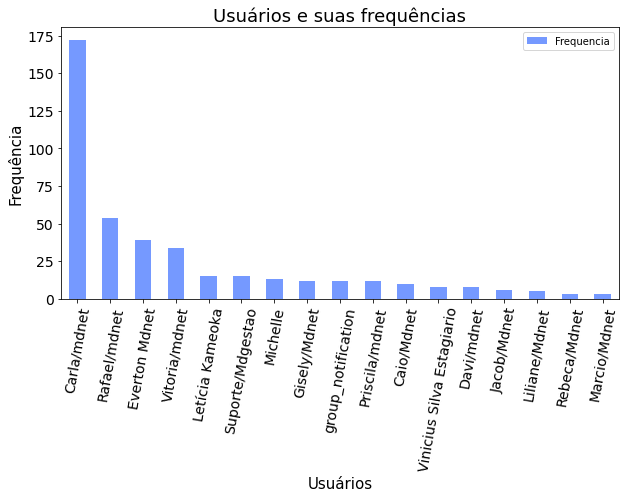

In [68]:
#Usuarios x quantidade de mensagens enviadas
#users_freq = df.Users.value_counts()
#users_df = pd.DataFrame(users_freq.items(),columns=['Usuario','Frequencia'])
#users_df = users_df.sort_values(by=['Frequencia'], ascending=False)
#users_df.plot(kind='bar', x = 'Usuario', y='Frequencia', title='Usuarios e suas frequencias', color='#7599ff', fontsize = 12,figsize = (8,5))


users_freq = df.Users.value_counts()
users_df = pd.DataFrame(users_freq.items(),columns=['Usuario','Frequencia'])
users_df = users_df.sort_values(by=['Frequencia'], ascending=False)
users_df.plot(kind="bar", x = 'Usuario' , y='Frequencia',color='#7599ff',figsize = (10,5),fontsize=14)
plt.xticks(rotation=80, horizontalalignment="center")
plt.title('Usuários e suas frequências', fontsize = 18)
plt.xlabel("Usuários",fontsize = 15)
plt.ylabel("Frequência",fontsize = 15)

**Gráfico com a frequência que cada usuário interagia com o grupo no período de 2021-01-10 à 2021-01-31**

Text(0, 0.5, 'Frequência')

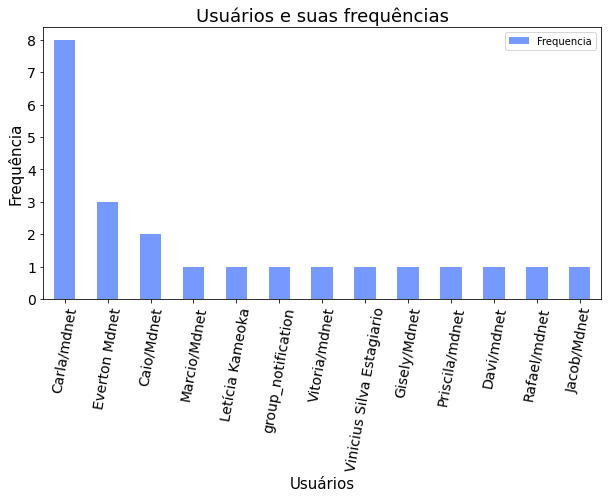

In [67]:
#Usuarios x quantidade de mensagens enviadas
users_freq = df_filter.Users.value_counts()
users_df = pd.DataFrame(users_freq.items(),columns=['Usuario','Frequencia'])
users_df = users_df.sort_values(by=['Frequencia'], ascending=False)
#users_df.plot(kind='bar', x = 'Usuario', y='Frequencia', title='Usuarios e suas frequencias', color='#7599ff',fontsize = 12,figsize = (8,5))
users_df.plot(kind="bar", x = 'Usuario' , y='Frequencia',color='#7599ff',figsize = (10,5),fontsize=14)
plt.xticks(rotation=80, horizontalalignment="center")
plt.title('Usuários e suas frequências', fontsize = 18)
plt.xlabel("Usuários",fontsize = 15)
plt.ylabel("Frequência",fontsize = 15)